In [61]:
import numpy as np
import scipy.linalg
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import clear_output

plt.rcParams['figure.figsize'] = [4, 3]
dir = 'BH_PEPS_LONGCUBICLINEARRAMP_0.001_0.02_31'
# dir = 'BH_PEPS_LONGCUBICLINEARRAMP_0.0025_0.05_31'
# dir = 'BH_PEPS_LONGCUBICLINEARRAMP_0.01_0.2_31'
# dir = 'BH_PEPS_LONGCUBICLINEARRAMP_0.025_0.5_31'
# dir = 'BH_PEPS_LONGCUBICLINEARRAMP_0.1_2.0_31'
# dir = 'BH_PEPS_LONGCUBICLINEARRAMP_0.25_5.0_31'
# dir = 'BH_PEPS_onepercent_LONGCUBICLINEARRAMP_0.0006_0.3_20'
# dir = 'BH_PEPS_LONGCUBICLINEARRAMP_0.025_2.0_121'
# dir = 'BH_PEPS_onepercent_LONGCUBICLINEARRAMP_0.0006_0.3_20'
# dir = './BH_PEPS_LONGCUBICLINEARRAMP_0.146597_20.0_2'

In [2]:
SPECS = dict(np.load(dir + "/SPECS.npz"))
for key in list(SPECS):
    SPECS[key] = SPECS[key].min()


# SPECS['n'] = 2
def pow_6(t, A, B):
    return A * (t / SPECS['tQ'] + 1) ** 6 + B * 0


def p0_6(ts, ys):
    x1 = ts[1] / SPECS['tQ'] + 1
    x2 = ts[2] / SPECS['tQ'] + 1
    y1 = ys[1]
    y2 = ys[2]
    alpha = np.log(y1 / y2) / np.log(x1 / x2)
    A = (y2 - y1) / (x2 ** 6 - x1 ** 6)
    B = y1 - A * x1
    return [A, B]


def pow_4(t, A, B):
    return A * (t / SPECS['tQ'] + 1) ** 4 + B * 0


def p0_4(ts, ys):
    x1 = ts[1] / SPECS['tQ'] + 1
    x2 = ts[2] / SPECS['tQ'] + 1
    y1 = ys[1]
    y2 = ys[2]
    alpha = np.log(y1 / y2) / np.log(x1 / x2)
    A = (y2 - y1) / (x2 ** 4 - x1 ** 4)
    B = y1 - A * x1
    return [A, B]


ts = []
CTMerror = []
Js = []
for i in range(SPECS['n']):
    PEPS = np.load(dir + ('/PEPS_{:05d}.npz'.format(i)))
    if 'tQ' in list(SPECS):
        ts.append(PEPS['iter'] * PEPS['dt'] - PEPS['tQ'])
    else:
        ts.append(PEPS['iter'] * PEPS['dt'])
    ENV = np.load(dir + ('/RHOA_{:05d}.npz'.format(i)))
    CTMerror.append(ENV['error'])
    PEPS = np.load(dir + ('/PEPS_{:05d}.npz'.format(i)))
    Js.append(PEPS['J'])

print(Js[1] * PEPS['dt'])
ENV = np.load(dir + ('/RHOA_{:05d}.npz'.format(i)))
print(np.trace(np.diag([0, 1, 4]) @ ENV['rhoA']) / np.trace(ENV['rhoA']) - 1)
print(np.trace(np.diag([0, 1, 4]) @ ENV['rhoB']) / np.trace(ENV['rhoB']) - 1)

2.2125000000000728e-07
(0.00011251723818106463+0j)
(0.00011251922316901641+0j)


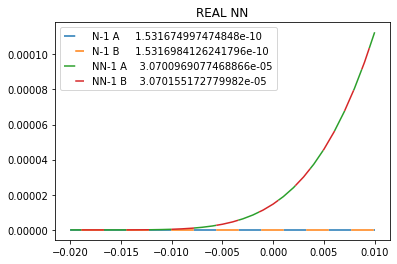

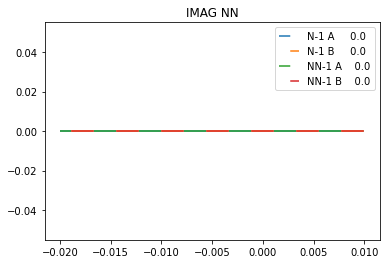

In [3]:
nA, nB, nnA, nnB = [], [], [], []
for i in range(SPECS['n']):
    ENV = np.load(dir + ('/RHOA_{:05d}.npz'.format(i)))
    rhoA = ENV['rhoA'] / np.trace(ENV['rhoA'])
    rhoB = ENV['rhoB'] / np.trace(ENV['rhoB'])
    nA.append(np.trace(rhoA @ np.diag([0, 1, 2])) - 1)
    nB.append(np.trace(rhoB @ np.diag([0, 1, 2])) - 1)
    nnA.append(np.trace(rhoA @ np.diag([0, 1, 4])) - 1)
    nnB.append(np.trace(rhoB @ np.diag([0, 1, 4])) - 1)

nA = np.array(nA)
nB = np.array(nB)
nnA = np.array(nnA)
nnB = np.array(nnB)

# maxind = 10
# ys = (nnA/2+nnB/2).real
# popt, pcov = curve_fit(pow_6,ts[:maxind],ys[:maxind],p0_6(ts,ys))
# print(p0_6(ts,ys))
# print(popt,np.sqrt(np.diag(pcov)))
#
# lim=maxind
# plt.clf()
# plt.title("REAL NN")
# plt.plot(ts[:lim], nA.real[:lim], label='N-1 A     ' + str(np.std(nA.real)), linestyle=(7.5, (15, 15)))
# plt.plot(ts[:lim], nB.real[:lim], label='N-1 B     ' + str(np.std(nB.real)), linestyle=(-7.5, (15, 15)))
# plt.plot(ts[:lim], nnA.real[:lim], label='NN-1 A    ' + str(np.std(nnA.real)), linestyle=(7.5, (15, 15)))
# plt.plot(ts[:lim], nnB.real[:lim], label='NN-1 B    ' + str(np.std(nnB.real)), linestyle=(-7.5, (15, 15)))
# plt.plot(ts[:lim],pow_6(ts[:lim],*popt),color='k')
# plt.legend()
# plt.show()

plt.clf()
plt.title("REAL NN")
plt.plot(ts, nA.real, label='N-1 A     ' + str(np.std(nA.real)), linestyle=(7.5, (15, 15)))
plt.plot(ts, nB.real, label='N-1 B     ' + str(np.std(nB.real)), linestyle=(-7.5, (15, 15)))
plt.plot(ts, nnA.real, label='NN-1 A    ' + str(np.std(nnA.real)), linestyle=(7.5, (15, 15)))
plt.plot(ts, nnB.real, label='NN-1 B    ' + str(np.std(nnB.real)), linestyle=(-7.5, (15, 15)))
plt.legend()
plt.show()

plt.clf()
plt.title("IMAG NN")
plt.plot(ts, nA.imag, label='N-1 A     ' + str(np.std(nA.imag)), linestyle=(7.5, (15, 15)))
plt.plot(ts, nB.imag, label='N-1 B     ' + str(np.std(nB.imag)), linestyle=(-7.5, (15, 15)))
plt.plot(ts, nnA.imag, label='NN-1 A    ' + str(np.std(nnA.imag)), linestyle=(7.5, (15, 15)))
plt.plot(ts, nnB.imag, label='NN-1 B    ' + str(np.std(nnB.imag)), linestyle=(-7.5, (15, 15)))
plt.legend()
plt.show()

[0.0002968869859566696, -1.4844349297833493e-05]
[ 2.18191803e-04 -1.48443493e-05] [inf inf]


/home/mazur/Dokumenty/pythonProject1/venv/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


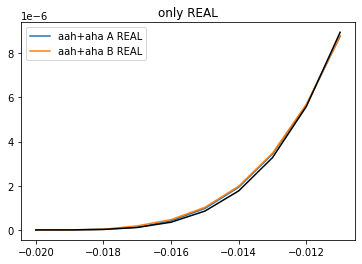

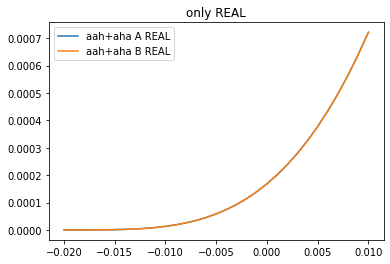

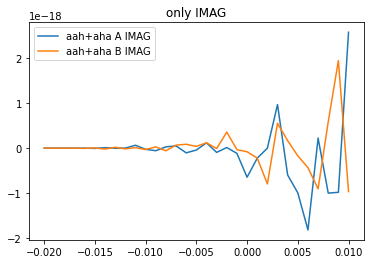

In [4]:
arA, arB = [], []
dist = 1

E_AB_aah = []
E_BA_aah = []
E_AB_aha = []
E_BA_aha = []

for i in range(SPECS['n']):
    try:
        corrAAH = dict(np.load(dir + "/CORR_AAH_WE_{:05d}.npz".format(i)))
        corrAHA = dict(np.load(dir + "/CORR_AHA_WE_{:05d}.npz".format(i)))

        E_AB_aha.append(corrAHA['corA'][dist])
        E_AB_aah.append(corrAAH['corA'][dist])
        E_BA_aha.append(corrAHA['corB'][dist])
        E_BA_aah.append(corrAAH['corB'][dist])
    except:
        print(i)
        break

E_AB_aha = np.array(E_AB_aha)
E_AB_aah = np.array(E_AB_aah)
E_BA_aha = np.array(E_BA_aha)
E_BA_aah = np.array(E_BA_aah)

maxind = 10
ys = (E_AB_aha / 4 + E_AB_aah / 4 + E_BA_aha / 4 + E_BA_aah / 4).real
popt, pcov = curve_fit(pow_4, ts[:maxind], ys[:maxind], p0_4(ts, ys))
print(p0_4(ts, ys))
print(popt, np.sqrt(np.diag(pcov)))

lim = maxind
plt.clf()
plt.title("only REAL")
plt.plot(ts[:lim], (E_AB_aha.real / 2 + E_AB_aah.real / 2)[:lim], label='aah+aha A REAL')
plt.plot(ts[:lim], (E_BA_aha.real / 2 + E_BA_aah.real / 2)[:lim], label='aah+aha B REAL')
plt.plot(ts[:lim], pow_4(ts[:lim], *popt), color='k')
plt.legend()
plt.show()

plt.clf()
plt.title("only REAL")
plt.plot(ts, E_AB_aha.real / 2 + E_AB_aah.real / 2, label='aah+aha A REAL')
plt.plot(ts, E_BA_aha.real / 2 + E_BA_aah.real / 2, label='aah+aha B REAL')
plt.legend()
plt.show()

plt.clf()
plt.title("only IMAG")
plt.plot(ts, E_AB_aha.imag / 2 + E_AB_aah.imag / 2, label='aah+aha A IMAG')
plt.plot(ts, E_BA_aha.imag / 2 + E_BA_aah.imag / 2, label='aah+aha B IMAG')
plt.legend()
plt.show()

In [ ]:
arA, arB = [], []
dist = 1

E_AB_WE_NN, E_BA_WE_NN, E_AB_NS_NN, E_BA_NS_NN = [], [], [], []

for i in range(SPECS['n'] + 1):
    try:
        corrNN_WE = dict(np.load(dir + "/CORR_NN_WE_{:05d}.npz".format(i)))
        corrNN_NS = dict(np.load(dir + "/CORR_NN_NS_{:05d}.npz".format(i)))

        E_AB_WE_NN.append(corrNN_WE['corA'][dist])
        E_BA_WE_NN.append(corrNN_WE['corB'][dist])
        E_AB_NS_NN.append(corrNN_NS['corA'][dist])
        E_BA_NS_NN.append(corrNN_NS['corB'][dist])
    except:
        print(i)
        break

E_AB_WE_NN = np.array(E_AB_WE_NN) - E_AB_WE_NN[0]
E_BA_WE_NN = np.array(E_BA_WE_NN) - E_BA_WE_NN[0]
E_AB_NS_NN = np.array(E_AB_NS_NN) - E_AB_NS_NN[0]
E_BA_NS_NN = np.array(E_BA_NS_NN) - E_BA_NS_NN[0]
average = E_AB_WE_NN + E_BA_WE_NN + E_AB_NS_NN + E_BA_NS_NN

# maxind = 4
# ps = polyfit(ts[:maxind],(average.real)[:maxind],2)
# print("A2 =",ps[0])
# print("JU =",SPECS['J']**2)
# print("A2 / JU =",ps[0]/(SPECS['J']**2))
# ANNspJJ = ps[0]/(SPECS['J']**2)

plt.clf()
plt.title("REAL")
plt.plot(ts, average, label='NN real')
# plt.plot(ts[:2*maxind],np.poly1d(ps)(np.array(ts[:maxind*2])),'--',color='k')
plt.legend()
plt.show()

plt.clf()
plt.title("IMAG")
plt.plot(ts, average.imag, label='NN imag')
plt.legend()
plt.show()

In [5]:
nnA, nnB, nA, nB = [], [], [], []
for i in range(SPECS['n']):
    ENV = np.load(dir + ('/RHOA_{:05d}.npz'.format(i)))
    rhoA = ENV['rhoA'] / np.trace(ENV['rhoA'])
    rhoB = ENV['rhoB'] / np.trace(ENV['rhoB'])
    nA.append(np.trace(rhoA @ np.diag([0, 1, 2])))
    nB.append(np.trace(rhoB @ np.diag([0, 1, 2])))
    nnA.append(np.trace(rhoA @ np.diag([0, 1, 4])))
    nnB.append(np.trace(rhoB @ np.diag([0, 1, 4])))

In [6]:
rhoA

array([[ 5.62593668e-05+0.00000000e+00j, -5.02521651e-11+1.42877699e-11j,
        -5.65351316e-10-8.55696917e-11j],
       [-5.02521651e-11-1.42877699e-11j,  9.99887482e-01+0.00000000e+00j,
        -1.19835891e-10+3.26153440e-11j],
       [-5.65351316e-10+8.55696917e-11j, -1.19835891e-10-3.26153440e-11j,
         5.62588683e-05+0.00000000e+00j]])

In [275]:
sss = """#!/bin/bash
#PBS -N sudden_19.6_D_NN
#PBS -l cput=3000:00:00
#PBS -q mp16
#PBS -o shiva_sudden_19.6_D_NN.out
#PBS -e shiva_sudden_19.6_D_NN.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-7 python -u PYPY chi D 1.0 4.9 dt NN MM < /dev/null > shortPEPS_PRRR.out & 2> shortPEPS_PRRR.err &

wait"""

runcom = ""
for PYPY in ['createFullBH_PEPS.py', 'createFullBH_PEPS_oldntu.py']:
    D = 7
    chi = 4
    t = 0.5
    nnn = int(5 * t / 0.1)
    prrr = sss.replace('D', str(D))
    prrr = prrr.replace('PYPY', PYPY)
    prrr = prrr.replace('PRRR', str(PYPY[18:20]))
    prrr = prrr.replace('chi', str(chi))
    prrr = prrr.replace('NN', str(30))
    prrr = prrr.replace('dt', str(0.005))
    prrr = prrr.replace('MM', str(10000000))

    filename = "run_sudden_FFF.sh".replace('FFF', str(PYPY[18:20]))
    runcom += "qsub " + filename + "\n"
    f = open(filename, "w")
    print(prrr)
    f.write(prrr)
    f.close()
f = open("runcom.txt", "w")
f.write(runcom)
f.close()

#!/bin/bash
#PBS -N sudden_19.6_7_30
#PBS -l cput=3000:00:00
#PBS -q mp16
#PBS -o shiva_sudden_19.6_7_30.out
#PBS -e shiva_sudden_19.6_7_30.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-7 python -u createFullBH_PEPS.py 4 7 1.0 4.9 0.005 30 10000000 < /dev/null > shortPEPS_py.out & 2> shortPEPS_py.err &

wait
#!/bin/bash
#PBS -N sudden_19.6_7_30
#PBS -l cput=3000:00:00
#PBS -q mp16
#PBS -o shiva_sudden_19.6_7_30.out
#PBS -e shiva_sudden_19.6_7_30.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-7 python -u createFullBH_PEPS_oldntu.py 4 7 1.0 4.9 0.005 30 10000000 < /dev/null > shortPEPS_ol.out & 2> shortPEPS_ol.err &

wait


In [274]:
print(runcom)

qsub run_sudden_py.sh
qsub run_sudden_ol.sh



In [5]:
sss = """#!/bin/bash
#PBS -N sudden_UpJ
#PBS -l cput=5000:00:00
#PBS -q mp16
#PBS -o shiva_sudden_UpJ_6_24.out
#PBS -e shiva_sudden_UpJ_6_24.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-15 python -u createFullBH_PEPS.py 24 6 1.0 UpJ 0.005 100 4 < /dev/null > shortPEPS_UpJ.out & 2> shortPEPS_UpJ.err &

wait"""

runcom = ""
for i in [1,2,4,8,16,32,64]:
    UpJ = 19.6 * i / 64
    prrr = sss.replace('UpJ', str(UpJ))
    filename = "run_short_UpJ.sh".replace('UpJ', str(UpJ))
    runcom += "qsub " + filename + "\n"
    f = open(filename, "w")
    f.write(prrr)
    f.close()
print(prrr)
f = open("runcom.txt", "w")
f.write(runcom)
f.close()
print(runcom)

#!/bin/bash
#PBS -N sudden_19.6
#PBS -l cput=5000:00:00
#PBS -q mp16
#PBS -o shiva_sudden_19.6_6_24.out
#PBS -e shiva_sudden_19.6_6_24.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-15 python -u createFullBH_PEPS.py 24 6 1.0 19.6 0.005 100 4 < /dev/null > shortPEPS_19.6.out & 2> shortPEPS_19.6.err &

wait
qsub run_short_0.30625.sh
qsub run_short_0.6125.sh
qsub run_short_1.225.sh
qsub run_short_2.45.sh
qsub run_short_4.9.sh
qsub run_short_9.8.sh
qsub run_short_19.6.sh



In [1]:
sss = """#!/bin/bash
#PBS -N sudden_UUU_6_24
#PBS -l cput=5000:00:00
#PBS -q mp16
#PBS -o shiva_sudden_UUU_6_24.out
#PBS -e shiva_sudden_UUU_6_24.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-15 python -u createFullBH_PEPS.py 24 6 1.0 UUU 0.005 100 1000 < /dev/null > shortPEPS_UUU.out & 2> shortPEPS_UUU.err &

wait"""

runcom = ""
for uuu in [4.3, 4.5, 4.7, 5.1, 5.3, 5.5]:
    prrr = sss.replace('UUU', str(uuu))
filename = "run_short_UUU.sh".replace('UUU', str(uuu))
runcom += "qsub " + filename + "\n"
f = open(filename, "w")
f.write(prrr)
f.close()
print(prrr)
f = open("runcom.txt", "w")
f.write(runcom)
f.close()

#!/bin/bash
#PBS -N sudden_4.3_6_24
#PBS -l cput=5000:00:00
#PBS -q mp16
#PBS -o shiva_sudden_4.3_6_24.out
#PBS -e shiva_sudden_4.3_6_24.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-15 python -u createFullBH_PEPS.py 24 6 1.0 4.3 0.005 100 1000 < /dev/null > shortPEPS_4.3.out & 2> shortPEPS_4.3.err &

wait
#!/bin/bash
#PBS -N sudden_4.5_6_24
#PBS -l cput=5000:00:00
#PBS -q mp16
#PBS -o shiva_sudden_4.5_6_24.out
#PBS -e shiva_sudden_4.5_6_24.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-15 python -u createFullBH_PEPS.py 24 6 1.0 4.5 0.005 100 1000 < /dev/null > shortPEPS_4.5.out & 2> shortPEPS_4.5.err &

wait
#!/bin/bash
#PBS -N sudden_4.7_6_24
#PBS -l cput=5000:00:00
#PBS -q mp16
#PBS -o shiva_sudden_4.7_6_24.out
#PBS -e shiva_sudden_4.7_6_24.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/loc

In [3]:
print(runcom)

qsub run_short_4.3.sh
qsub run_short_4.5.sh
qsub run_short_4.7.sh
qsub run_short_5.1.sh
qsub run_short_5.3.sh
qsub run_short_5.5.sh



In [22]:
import numpy as np

f = open("shortPEPS_py.out", "r")
lines = f.readlines()
data = []
for i in lines:
    if "\t\t" in i: continue
    if not "\t" in i: continue
    if "SVDU" in i:
        data = []
        continue
    line = (i[:-1].split("\t"))
    print((line[1][1:-1]), line[2])
    data.append([int(line[1][1:-1]), float(line[2])])

0  6.623097503767358e-16
0  5.316608804645309e-16
0  8.870957102909417e-16
0  3.820930333823511e-15
1  1.6070542658143764e-15
2  1.6070516364920796e-15
3  1.6070515843364207e-15
4  1.6070516044534348e-15
0  4.696153519278029e-15
1  2.1154951931057646e-15
2  2.115491663812013e-15
3  2.115491590807037e-15
4  2.1154915866638273e-15
5  2.1154917037538523e-15
0  5.3028987603386805e-15
1  1.7709451059086238e-15
2  1.174715760472813e-15
3  1.0953242207881813e-15
4  1.079735280909008e-15
5  1.0769922495649331e-15
6  1.0764827622494035e-15
7  1.0763740490223345e-15
8  1.0763459500611325e-15
9  1.0763372844646202e-15
10  1.0763343339315807e-15
11  1.0763332170724527e-15
12  1.0763326857281367e-15
13  1.076332583223372e-15
14  1.07633246614376e-15
15  1.076332464235584e-15
16  1.0763324302350074e-15
17  1.0763325346905173e-15
0  3.807571481330842e-15
1  1.8075520925588667e-15
2  1.8074943814346624e-15
3  1.8074945528692674e-15
0  9.971148742024885e-15
1  6.41978380953458e-15
2  6.419756751633734e

In [29]:
data = np.array(data)

for i in range(1, data.shape[0]):
    print(i, 1 - (data[i, 1]) / data[i - 1, 1])

1 0.43700203584172836
2 0.03403150027681523
3 0.002097219035438469
4 0.0011379014296624135
5 0.0006480955741240413
6 0.00036773281739965746
7 0.00020863401499393586
8 0.00011883028197912093
9 6.8288207526912e-05
10 3.988483395922504e-05
11 2.393125956612341e-05
12 1.4968234676726588e-05
13 9.92704363822483e-06
14 7.085024428921116e-06
15 5.475890332951039e-06
16 4.557867299914697e-06
17 4.027272548334793e-06
18 3.713912079317261e-06
19 3.522412549972209e-06
20 3.399329943754026e-06
21 3.314720028568807e-06
22 3.25180629312527e-06
23 3.2011878731141863e-06
24 3.1575967143204764e-06
25 3.1180822116505524e-06
26 3.0809900879447127e-06
27 3.045393982215039e-06
28 3.010774242473424e-06
29 2.9768386740069985e-06
30 2.9434234564140738e-06
31 2.910434853675703e-06
32 2.877821617786047e-06
33 2.8455547383954283e-06
34 2.813614533248021e-06
35 2.781991813805007e-06
36 2.7506803097487875e-06
37 2.719674381035375e-06
38 2.688971265873974e-06
39 2.6585685926061586e-06
40 2.628464697673749e-06
41 2.

In [35]:
import scipy, time
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import clear_output

n, d = 100, 30
t_svd, t_pinv = [], []

for iter in range(1000):
    if
iter % 100 == 0: print(iter)
A = np.random.randn(n, n) + 1j * np.random.randn(n, n)
B = np.random.randn(n, n) + 1j * np.random.randn(n, n)
I = np.diag([1] * (n - d) + [0] * d)
b = np.random.randn(n)
M = A @ I @ B

t = time.time()
for i in range(1):
    s = np.linalg.svd(M, compute_uv=False)
t_svd.append(time.time() - t)

t = time.time()
for i in range(1):
    s = np.linalg.pinv(M)
t_pinv.append(time.time() - t)

clear_output(True)
print(np.mean(t_svd), "\t", np.std(t_svd))
print(np.mean(t_pinv), "\t", np.std(t_pinv))

0.0038260402679443357 	 0.007917133018631997
0.00891042709350586 	 0.011578121836031784


In [131]:
import scipy, time
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import clear_output
from numpy.linalg import norm
from ncon import ncon

In [229]:
data = dict(np.load("data.npz"))
A = data['A']
B = data['B']
QA = data['QA']
QB = data['QB']
RA = data['RA']
RB = data['RB']
gA = data['gA']
JA = data['JA']
MB = data['MB']


def CalculateError(MA):
    W = MA @ MB.T - RA @ RB.T
    tensors = [B, B.conj(), A, A.conj(), B, B.conj(), B, B.conj(), A, A.conj(), A, A.conj(), QA, QA.conj(), QB,
               QB.conj(), W, W.conj()]
    connects = [[15, 14, 17, 16, 2], [15, 13, 18, 16, 2], [10, 9, 12, 14, 1], [10, 9, 11, 13, 1],
                [21, 19, 23, 22, 3], [21, 20, 23, 22, 3], [24, 26, 28, 29, 4], [25, 27, 28, 29, 4],
                [37, 31, 30, 26, 5], [38, 31, 30, 27, 5], [34, 33, 32, 36, 6], [34, 33, 32, 35, 6],
                [17, 40, 24, 19, 7], [18, 41, 25, 20, 7], [12, 36, 37, 39, 8], [11, 35, 38, 42, 8], [40, 39],
                [41, 42]]
    con_order = [15, 16, 2, 28, 29, 4, 34, 33, 32, 6, 21, 23, 22, 3, 20, 35, 42, 41, 10, 9, 1, 31, 30, 5, 14,
                 13,
                 18, 11, 26, 27, 39, 25, 38, 12, 36, 8, 37, 17, 19, 7, 24, 40]
    return ncon(tensors, connects, con_order)

In [230]:
gA = gA.reshape(900, 900)
U, s, Vh = np.linalg.svd(gA)
s = s / s[0]

In [231]:
error_pinv = []
for i in np.arange(1, 20, 1):
    print(i)
    MA = np.linalg.pinv(gA.reshape(900, 900).T, rcond=1 / 10 ** i) @ JA.reshape(900)
    error_pinv.append([i, CalculateError(MA.reshape(90, 10))])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [232]:
error_pinv

[[1, array(9.23313991e-05+1.61465656e-21j)],
 [2, array(5.50077142e-06+8.86737617e-22j)],
 [3, array(2.7235658e-07+1.15805286e-23j)],
 [4, array(3.17306425e-08-2.17134911e-24j)],
 [5, array(2.33321587e-09-3.87740912e-26j)],
 [6, array(2.19916568e-11-3.23117427e-27j)],
 [7, array(3.27718103e-12-1.57772181e-30j)],
 [8, array(1.0330209e-12+2.61901821e-28j)],
 [9, array(9.50841068e-13-4.65427934e-29j)],
 [10, array(9.49672874e-13+1.37261798e-28j)],
 [11, array(9.49572007e-13-7.4941786e-29j)],
 [12, array(9.49572007e-13-7.4941786e-29j)],
 [13, array(9.49572007e-13-7.4941786e-29j)],
 [14, array(9.49572007e-13-7.4941786e-29j)],
 [15, array(9.49572007e-13-7.4941786e-29j)],
 [16, array(9.49572007e-13-7.4941786e-29j)],
 [17, array(9.49572007e-13-7.4941786e-29j)],
 [18, array(9.49572007e-13-7.4941786e-29j)],
 [19, array(9.49572007e-13-7.4941786e-29j)]]

In [233]:
error_svd = []
U, s, Vh = np.linalg.svd(gA.reshape(900, 900).T)
sn = []

for i in np.arange(200, 902, 9):
    print(i)
    MA = (Vh.conj().T[:, :i] @ np.diag(1 / s[:i]) @ U.conj().T[:i, :] @ JA.reshape(900)).reshape(90, 10)
    sn.append(s[i] / s[0])
    error_svd.append([i, CalculateError(MA)])

200
209
218
227
236
245
254
263
272
281
290
299
308
317
326
335
344
353
362
371
380
389
398
407
416
425
434
443
452
461
470
479
488
497
506
515
524
533
542
551
560
569
578
587
596
605
614
623
632
641
650
659
668
677
686
695
704
713
722
731
740
749
758
767
776
785
794
803
812
821
830
839
848
857
866
875
884
893


/home/mazur/Dokumenty/pythonProject1/venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


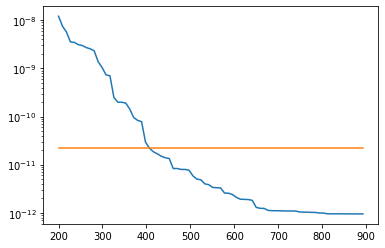

In [234]:
error_svd = np.array(error_svd).T
plt.yscale('log')
plt.plot(error_svd[0], np.abs(error_svd[1]))
plt.plot(error_svd[0], [2.19916568e-11] * len(error_svd[0]))
plt.show()

In [235]:
for i in range(900):
    print(i, "   ", np.abs(error_svd[1])[i])

0     1.2138114890215634e-08
1     7.519945277155677e-09
2     5.715142157327437e-09
3     3.5498349372725494e-09
4     3.4716051019780972e-09
5     3.1166992950540365e-09
6     2.990271633301376e-09
7     2.7102850742491548e-09
8     2.5556488056258125e-09
9     2.3332187638668806e-09
10     1.385648690032039e-09
11     1.050846430926913e-09
12     7.3574555808727e-10
13     7.048037577301681e-10
14     2.4919397298204205e-10
15     1.9848061415482978e-10
16     1.9847708726492103e-10
17     1.899739284335314e-10
18     1.4361641909864739e-10
19     9.563243381013181e-11
20     8.336279220199809e-11
21     7.84400613390614e-11
22     2.931926751672891e-11
23     2.1996475973147937e-11
24     1.8520617495076652e-11
25     1.682469397299302e-11
26     1.4977679822740098e-11
27     1.394013278897674e-11
28     1.345492507638958e-11
29     8.335740998271024e-12
30     8.335346838872192e-12
31     7.974963661133252e-12
32     7.974601088259003e-12
33     7.69786139996443e-12
34     5.84702

IndexError: index 78 is out of bounds for axis 0 with size 78

In [237]:
sn[22:25]

[1.2637876503826865e-06, 1.0623843990472412e-06, 7.036967349749969e-07]

In [164]:
for i in range(900):
    print(i, "   ", s[i] / s[0])

0     1.0
1     0.9999999999999998
2     0.9999999999999983
3     0.12819334731315182
4     0.12819334731315138
5     0.12819334731315116
6     0.12791782996561318
7     0.12791782996561282
8     0.1279178299656128
9     0.11227985159869808
10     0.11227985159869797
11     0.11227985159869773
12     0.11024510998081925
13     0.11024510998081916
14     0.1102451099808191
15     0.014393175776842656
16     0.014393175776842557
17     0.014393175776842524
18     0.014363140185298813
19     0.014363140185298332
20     0.014363140185297881
21     0.014133149776871487
22     0.014133149776871247
23     0.014133149776871069
24     0.014101609794102915
25     0.01410160979410285
26     0.014101609794102833
27     0.01171409867395944
28     0.011714098673959287
29     0.011714098673959282
30     0.009012643995967951
31     0.009012643995967929
32     0.009012643995967917
33     0.008827684198052885
34     0.008827684198052818
35     0.008827684198052816
36     0.006002070453134445
37     0.00

In [270]:
s / s[0]

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.28193347e-01,
       1.28193347e-01, 1.28193347e-01, 1.27917830e-01, 1.27917830e-01,
       1.27917830e-01, 1.12279852e-01, 1.12279852e-01, 1.12279852e-01,
       1.10245110e-01, 1.10245110e-01, 1.10245110e-01, 1.43931758e-02,
       1.43931758e-02, 1.43931758e-02, 1.43631402e-02, 1.43631402e-02,
       1.43631402e-02, 1.41331498e-02, 1.41331498e-02, 1.41331498e-02,
       1.41016098e-02, 1.41016098e-02, 1.41016098e-02, 1.17140987e-02,
       1.17140987e-02, 1.17140987e-02, 9.01264400e-03, 9.01264400e-03,
       9.01264400e-03, 8.82768420e-03, 8.82768420e-03, 8.82768420e-03,
       6.00207045e-03, 6.00207045e-03, 6.00207045e-03, 5.99290892e-03,
       5.99290892e-03, 5.99290892e-03, 1.50165008e-03, 1.50165008e-03,
       1.50165008e-03, 1.49836986e-03, 1.49836986e-03, 1.49836986e-03,
       1.26486975e-03, 1.26486975e-03, 1.26486975e-03, 1.15528743e-03,
       1.15528743e-03, 1.15528743e-03, 1.15294703e-03, 1.15294703e-03,
      

In [269]:
np.where(s / s[0] > 6e-11, 0, 1)[np.argmax(np.diff(np.where(s / s[0] > 6e-11, 0, 1))) - len(s)]

0

In [238]:
np.floor(np.log10(np.abs(error_svd[1])))

array([ -8.,  -9.,  -9.,  -9.,  -9.,  -9.,  -9.,  -9.,  -9.,  -9.,  -9.,
        -9., -10., -10., -10., -10., -10., -10., -10., -11., -11., -11.,
       -11., -11., -11., -11., -11., -11., -11., -12., -12., -12., -12.,
       -12., -12., -12., -12., -12., -12., -12., -12., -12., -12., -12.,
       -12., -12., -12., -12., -12., -12., -12., -12., -12., -12., -12.,
       -12., -12., -12., -12., -12., -12., -12., -12., -12., -12., -12.,
       -13., -13., -13., -13., -13., -13., -13., -13., -13., -13., -13.,
       -13.])

In [239]:
np.diff(np.floor(np.log10(np.abs(error_svd[1]))))

array([-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,
        0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [244]:
np.where(np.diff(np.floor(np.log10(np.abs(sn)))) == -1, np.abs(error_svd[1])[:-1], 0 * np.abs(error_svd[1])[:-1])

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.33321876e-09, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.19964760e-11,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.32401670e-12, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [78]:
from ncon import ncon
import numpy as np
import time


def CalcOG(A, B, W, QA, QB):
    tensors = [B, B.conj(), A, A.conj(), B, B.conj(), B, B.conj(), A, A.conj(), A, A.conj(), QA, QA.conj(), QB,
               QB.conj(), W, W.conj()]
    connects = [[15, 14, 17, 16, 2], [15, 13, 18, 16, 2], [10, 9, 12, 14, 1], [10, 9, 11, 13, 1],
                [21, 19, 23, 22, 3], [21, 20, 23, 22, 3], [24, 26, 28, 29, 4], [25, 27, 28, 29, 4],
                [37, 31, 30, 26, 5], [38, 31, 30, 27, 5], [34, 33, 32, 36, 6], [34, 33, 32, 35, 6],
                [17, 40, 24, 19, 7], [18, 41, 25, 20, 7], [12, 36, 37, 39, 8], [11, 35, 38, 42, 8], [40, 39],
                [41, 42]]
    con_order = [15, 16, 2, 28, 29, 4, 34, 33, 32, 6, 21, 23, 22, 3, 20, 35, 42, 41, 10, 9, 1, 31, 30, 5, 14, 13, 18,
                 11, 26, 27, 39, 25, 38, 12, 36, 8, 37, 17, 19, 7, 24, 40]
    return ncon(tensors, connects, con_order)


def CalcTEST(A, B, W, QA, QB):
    D = A.shape[0]
    d = A.shape[-1]
    DDDd = D * D * D * d
    DDd = D * D * d

    tensors = [B.swapaxes(0, 1).swapaxes(1, 2).reshape(D, D, DDd),
               B.conj().swapaxes(0, 1).swapaxes(1, 2).reshape(D, D, DDd),
               A.swapaxes(4, 3).swapaxes(3, 2).reshape(DDd, D, D),
               A.conj().swapaxes(4, 3).swapaxes(3, 2).reshape(DDd, D, D), B.swapaxes(0, 1).reshape(D, DDDd),
               B.conj().swapaxes(0, 1).reshape(D, DDDd), B.reshape(D, D, DDd), B.conj().reshape(D, D, DDd),
               A.swapaxes(4, 3).reshape(D, DDd, D), A.conj().swapaxes(4, 3).reshape(D, DDd, D),
               A.swapaxes(4, 3).reshape(DDDd, D), A.conj().swapaxes(4, 3).reshape(DDDd, D),
               QA, QA.conj(), QB, QB.conj(), W, W.conj()]
    connects = [[14, 17, 2], [13, 18, 2], [3, 12, 14], [3, 11, 13], [19, 1], [20, 1], [24, 26, 4], [25, 27, 4],
                [37, 5, 26], [38, 5, 27], [6, 36], [6, 35], [17, 40, 24, 19, 7], [18, 41, 25, 20, 7],
                [12, 36, 37, 39, 8], [11, 35, 38, 42, 8], [40, 39], [41, 42]]
    con_order = [41, 39, 6, 1, 2, 4, 3, 5, 14, 13, 26, 27, 35, 20, 42, 18, 11, 25, 38, 12, 36, 8, 37, 17, 19, 7, 24, 40]
    return ncon(tensors, connects, con_order)

In [79]:
d, D, Dr = 3, 7, 9*7
tog,ttest=[],[]
for i in range(100):
    A = np.random.randn(D, D, D, D, d)
    B = np.random.randn(D, D, D, D, d)
    W = np.random.randn(Dr, Dr)
    QA = np.random.randn(D, Dr, D, D, d)
    QB = np.random.randn(D, D, D, Dr, d)

    t0 = time.time()
    for i in range(1):
        asdadssd = (CalcOG(A, B, W, QA, QB))
    tog.append(time.time() - t0)

    t0 = time.time()
    for i in range(1):
        asdadssd = (CalcTEST(A, B, W, QA, QB))
    ttest.append(time.time() - t0)
print(np.mean(tog),np.std(tog))
print(np.mean(ttest),np.std(ttest))

0.05788975238800049 0.021929338660524735
0.04928636312484741 0.026428994181634902


In [81]:
d, D, Dr = 3, 7, 9*7
tog,ttest=[],[]
for i in range(100):
    A = np.random.randn(D, D, D, D, d)
    B = np.random.randn(D, D, D, D, d)
    W = np.random.randn(Dr, Dr)
    QA = np.random.randn(D, Dr, D, D, d)
    QB = np.random.randn(D, D, D, Dr, d)
    a1,a2 = (CalcOG(A, B, W, QA, QB)),(CalcTEST(A, B, W, QA, QB))
    a = np.sqrt(a1**2+a2**2)
    print(a1/a-a2/a)

1.1102230246251565e-16
3.3306690738754696e-16
1.1102230246251565e-16
-1.1102230246251565e-16
1.1102230246251565e-16
-1.1102230246251565e-16
-1.1102230246251565e-16
0.0
0.0
0.0
0.0
0.0
0.0
1.1102230246251565e-16
3.3306690738754696e-16
0.0
0.0
1.1102230246251565e-16
2.220446049250313e-16
-1.1102230246251565e-16
-1.1102230246251565e-16
0.0
0.0
0.0
-1.1102230246251565e-16
0.0
0.0
-1.1102230246251565e-16
1.1102230246251565e-16
-1.1102230246251565e-16
0.0
0.0
0.0
-2.220446049250313e-16
-1.1102230246251565e-16
-1.1102230246251565e-16
0.0
-1.1102230246251565e-16
0.0
0.0
-1.1102230246251565e-16
0.0
0.0
0.0
0.0
0.0
2.220446049250313e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
2.220446049250313e-16
3.3306690738754696e-16
-1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
-1.1102230246251565e-16
0.0
0.0
0.0
-5.551115123125783e-16
2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
1.1102230246251565e-16
-2.220446049250313e-16
0.0
2.220446049250313e-16
1.11022302462515